# Unraveling the Challenges of Unemployment in Africa: A Data-Driven Approach

## By Obi-Okonkwo, Chisom

### The data analysis aims to provide practical insights and evidence-based solutions to address unemployment issues in African countries, providing crucial guidance for informed policymaking and effective initiatives.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

#### Importing the six datasets provided

In [2]:
# read all the csv files
gender_unemployment = pd.read_csv('1. unemployment-rate-men-vs-women.csv')
national_strategy = pd.read_csv('2. national-strategy-for-youth-employment.csv')
education_budget = pd.read_csv('3. share-of-education-in-government-expenditure.csv')
electricity_access = pd.read_csv('4. share-of-the-population-with-access-to-electricity.csv')
llc_number = pd.read_excel('5. Total_firms_Historical_data.xlsx')
country_code = pd.read_csv('6. Country Codes.csv')

#### Datasets Overview

In [3]:
gender_unemployment.dtypes

Entity                                                                    object
Code                                                                      object
Year                                                                       int64
Unemployment, female (% of female labor force) (modeled ILO estimate)    float64
Unemployment, male (% of male labor force) (modeled ILO estimate)        float64
Population (historical estimates)                                        float64
Continent                                                                 object
dtype: object

In [4]:
national_strategy.dtypes

Entity                                                                                                                                                                            object
Code                                                                                                                                                                              object
Year                                                                                                                                                                               int64
8.b.1 - Existence of a developed and operationalized national strategy for youth employment, as a distinct strategy or as part of a national employment strategy - SL_CPA_YEMP     int64
dtype: object

In [5]:
education_budget.dtypes

Entity                                                                       object
Code                                                                         object
Year                                                                          int64
Government expenditure on education, total (% of government expenditure)    float64
dtype: object

In [6]:
electricity_access.dtypes

Entity                                      object
Code                                        object
Year                                         int64
Access to electricity (% of population)    float64
dtype: object

In [7]:
llc_number.dtypes

Economy                                           object
Adult population                                 float64
Year                                             float64
TOTAL Number of \nLimited Liability Companies    float64
Total business density rate                      float64
dtype: object

In [8]:
country_code.dtypes

name            object
alpha-2         object
alpha-3         object
country-code     int64
region          object
sub-region      object
dtype: object

#### Changing the datatype of the Year column from float to integer for smooth merging with other dataframes

In [9]:
llc_number['Year'] = llc_number['Year'].fillna(0)

# Convert the 'Year' column to int64
llc_number['Year'] = llc_number['Year'].astype('int64')

### Merging the six (6) dataframes

In [10]:
# Merge 1st and 2nd
merged_df = pd.merge(gender_unemployment, national_strategy, on=['Entity', 'Code', 'Year'], how='outer')
# Merge the 3rd
merged_df = pd.merge(merged_df, education_budget, on=['Entity', 'Code', 'Year'], how='outer')
# Merge the 4th
merged_df = pd.merge(merged_df, electricity_access, on=['Entity', 'Code', 'Year'], how='outer')
# Merge the 6th
merged_df = pd.merge(merged_df, country_code, left_on=['Entity'], right_on=['name'], how='outer')
# Merge the 5th
merged_df = pd.merge(merged_df, llc_number, left_on=['Entity', 'Year'], right_on=['Economy', 'Year'], how='outer')

### Rename Columns and Drop Some

In [11]:
merged_df = merged_df.rename(columns={'Entity': 'Country'})
merged_df.columns.values[3] = 'female_unemployed'
merged_df.columns.values[4] = 'male_unemployed'
merged_df.columns.values[5] = 'Population'
merged_df.columns.values[7] = 'Strategy_level'
merged_df.columns.values[8] = 'Education_expenditure'
merged_df.columns.values[9] = 'electricity_access'
merged_df.columns.values[14] = 'Region'
merged_df.columns.values[18] = 'LLC_companies'
merged_df.columns.values[19] = 'Business_Density_rate'

In [12]:
# Drop irrelevant columns
columns_to_drop = [6, 10, 11, 12, 13, 15, 16]

merged_df = merged_df.drop(merged_df.columns[columns_to_drop], axis=1)

### Remove Rows with Empty Regions

In [13]:
merged_df = merged_df[merged_df['Region'].notna()]

In [14]:
merged_df.head()

,Country,Code,Year,female_unemployed,male_unemployed,Population,Strategy_level,Education_expenditure,electricity_access,Region,Adult population,LLC_companies,Business_Density_rate
1,Afghanistan,AFG,1991.0,13.615,10.089,10745168.0,NaN,NaN,NaN,Asia,NaN,NaN,NaN
2,Afghanistan,AFG,1992.0,13.816,10.258,12057436.0,NaN,NaN,NaN,Asia,NaN,NaN,NaN
3,Afghanistan,AFG,1993.0,13.712,10.165,14003764.0,NaN,NaN,NaN,Asia,NaN,NaN,NaN
4,Afghanistan,AFG,1994.0,13.722,10.170,15455560.0,NaN,NaN,NaN,Asia,NaN,NaN,NaN
5,Afghanistan,AFG,1995.0,14.235,10.610,16418911.0,NaN,NaN,NaN,Asia,NaN,NaN,NaN


# Africa vs the rest of the world

### Questions and Hypotheses

1. **Impact of Education Budget on Unemployment:**
   - *Question:* Does a larger education percentage budget correlate with improved unemployment rates?
   - *Hypothesis:* We hypothesize that a higher allocation of the budget to education will positively influence employment.

2. **Effect of Access to Electricity on Unemployment:**
   - *Question:* Does better access to electricity correlate with improved unemployment rates?
   - *Hypothesis:* We hypothesize that improved access to electricity can positively impact unemployment by fostering economic development, supporting business activities, and creating job opportunities.

3. **Youth Employment Strategies and Unemployment:**
   - *Question:* Does the existence of a youth employment strategy correlate with improved unemployment rates?
   - *Hypothesis:* We hypothesize that the implementation of effective youth employment strategies can contribute to reducing unemployment rates by addressing the specific challenges faced by the youth in entering the workforce.

4. **Business Density and its Impact on Unemployment:**
   - *Question:* Does a higher business density correlate with improved unemployment rates?
   - *Hypothesis:* We hypothesize that a higher business density positively influences unemployment by creating more job opportunities and contributing to overall economic growth.

### Compare each Region's Unemployment Rates (Female and Male)

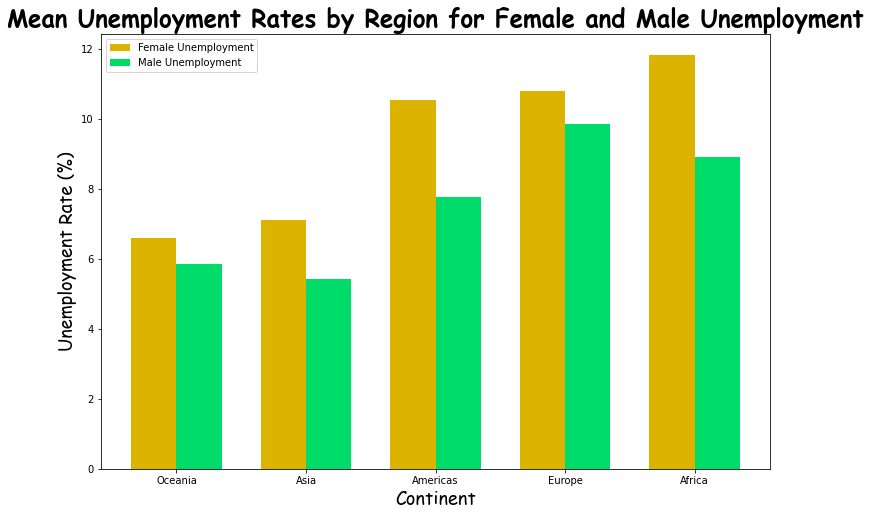

In [15]:
# Group by Region and calculate the mean for both female and male unemployment
mean_values = merged_df.groupby('Region')[['female_unemployed', 'male_unemployed']].mean()

# Sort values in descending order by female_unemployed
mean_values = mean_values.sort_values(by='female_unemployed', ascending=True)

# Set a larger figure size
plt.figure(figsize=(12, 8))

# Plotting the clustered bar chart with custom colors
bar_width = 0.35
bar_positions_female = range(len(mean_values))
bar_positions_male = [pos + bar_width for pos in bar_positions_female]

plt.bar(bar_positions_female, mean_values['female_unemployed'], color='#DCB400', width=bar_width, label='Female Unemployment')
plt.bar(bar_positions_male, mean_values['male_unemployed'], color='#00DC69', width=bar_width, label='Male Unemployment')

# Customize x-axis labels
plt.xticks([pos + bar_width / 2 for pos in bar_positions_female], mean_values.index)

plt.xlabel('Continent', fontfamily='Comic Sans MS', fontsize=18)
plt.ylabel('Unemployment Rate (%)', fontfamily='Comic Sans MS', fontsize=18)
plt.title('Mean Unemployment Rates by Region for Female and Male Unemployment', fontfamily='Comic Sans MS', fontsize=24, fontweight='bold')
plt.legend()
plt.savefig("female_male_unemployment",bbox_figure="tight",dpi=300)
plt.show()

### Compare each Region's percentage Budget Allocated to Education

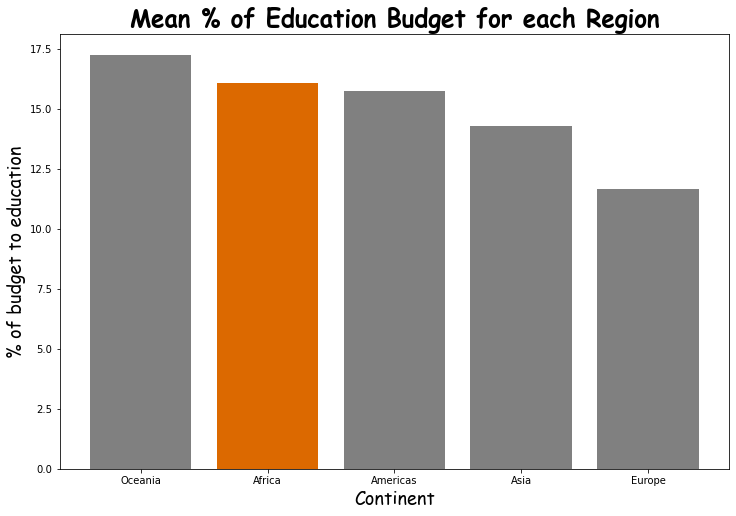

In [16]:
# Group by Continent and calculate the mean
mean_values = merged_df.groupby('Region')['Education_expenditure'].mean()

# Sort values in descending order
mean_values = mean_values.sort_values(ascending=False)

# Set a larger figure size
plt.figure(figsize=(12, 8))

# Plotting the bar chart with custom colors
colors = ['#DC6900' if continent == 'Africa' else 'grey' for continent in mean_values.index]
plt.bar(mean_values.index, mean_values.values, color=colors)

plt.xlabel('Continent', fontfamily='Comic Sans MS', fontsize=18)
plt.ylabel('% of budget to education', fontfamily='Comic Sans MS', fontsize=18)
plt.title('Mean % of Education Budget for each Region', fontfamily='Comic Sans MS', fontsize=24, fontweight='bold')
plt.savefig("Mean_%_of_Education_Budget_for_each_Region",bbox_figure="tight",dpi=300)
# Show the plot
plt.show()

### Compare each Region's percentage access to electricity

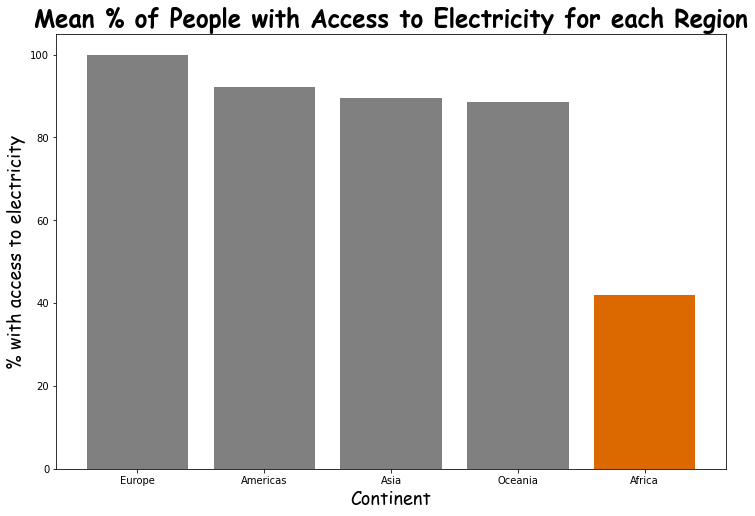

In [17]:
# Group by Continent and calculate the mean
mean_values = merged_df.groupby('Region')['electricity_access'].mean()

# Sort values in descending order
mean_values = mean_values.sort_values(ascending=False)

# Set a larger figure size
plt.figure(figsize=(12, 8))

# Plotting the bar chart with custom colors
colors = ['#DC6900' if continent == 'Africa' else 'grey' for continent in mean_values.index]
plt.bar(mean_values.index, mean_values.values, color=colors)

plt.xlabel('Continent', fontfamily='Comic Sans MS', fontsize=18)
plt.ylabel('% with access to electricity', fontfamily='Comic Sans MS', fontsize=18)
plt.title('Mean % of People with Access to Electricity for each Region', fontfamily='Comic Sans MS', fontsize=24, fontweight='bold')
plt.savefig("Mean_%_of_People_with_Access to Electricity_for_each_Region",bbox_figure="tight",dpi=300)
plt.show()

### Counting occurrences for each youth empowerment category within each continent

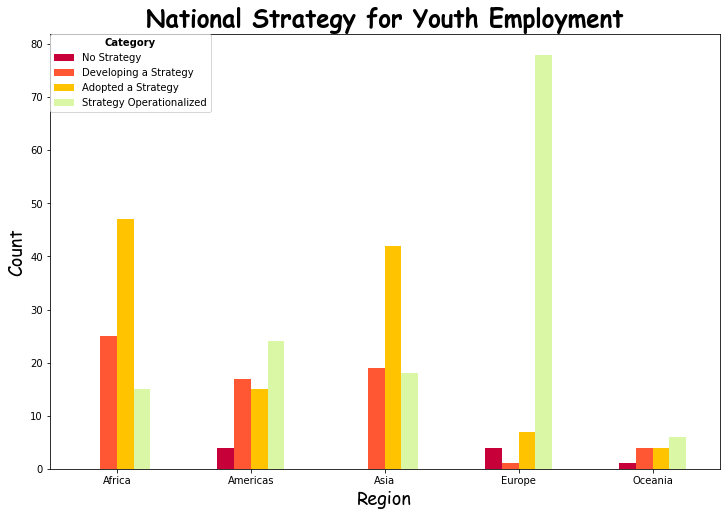

In [18]:
# Counting occurrences for each youth empowerment category within each continent
counts = merged_df.groupby(['Region', 'Strategy_level']).size().unstack(fill_value=0)

# Custom color palette
custom_colors = ['#C70039', '#FF5733', '#FFC300', '#DAF7A6']

# Plotting the clustered bar chart
ax = counts.plot(kind='bar', stacked=False, color=custom_colors, figsize=(12, 8))

plt.title('National Strategy for Youth Employment', fontfamily='Comic Sans MS', fontsize=24, fontweight='bold')
plt.xlabel('Region', fontfamily='Comic Sans MS', fontsize=18)
plt.ylabel('Count', fontfamily='Comic Sans MS', fontsize=18)
plt.xticks(rotation=0)  # Rotate x-axis labels to be horizontal

# Legend replacements
legend_labels = {
    0: 'No Strategy',
    1: 'Developing a Strategy',
    2: 'Adopted a Strategy',
    3: 'Strategy Operationalized'
}

# Replace legend labels
handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(handles, [legend_labels[int(float(label))] for label in labels], title='Category', loc='upper left', bbox_to_anchor=(0, 1), borderaxespad=0.)
legend.get_title().set_fontweight('bold')  # Set legend title to bold

plt.savefig("National_Strategy_for_Youth_Employment", bbox_inches="tight", dpi=300)
# Show the plot
plt.show()

### Mean Business density Rate for each Region

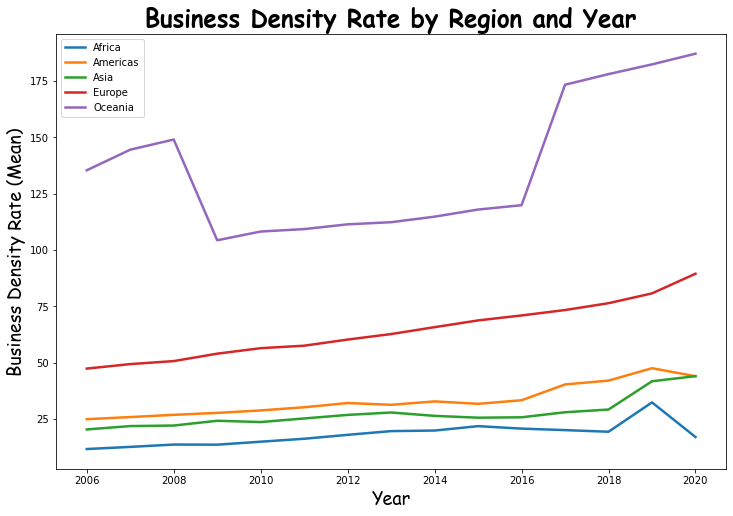

In [19]:
# Calculate the mean business density ratio for each combination of Region and Year
mean_density = merged_df.groupby(['Region', 'Year'])['Business_Density_rate'].mean().reset_index()

# Create a line plot
plt.figure(figsize=(12, 8))

# Iterate over unique regions and plot a line for each with a thicker linewidth
for region in mean_density['Region'].unique():
    region_data = mean_density[mean_density['Region'] == region]
    plt.plot(region_data['Year'], region_data['Business_Density_rate'], label=region, linewidth=2.5)  # Adjust linewidth as needed

# Set plot labels and title
plt.xlabel('Year', fontfamily='Comic Sans MS', fontsize=18)
plt.ylabel('Business Density Rate (Mean)', fontfamily='Comic Sans MS', fontsize=18)
plt.title('Business Density Rate by Region and Year', fontfamily='Comic Sans MS', fontsize=24, fontweight='bold')

# Add a legend
plt.legend()

plt.savefig("Business_Density_Rate_by_Region_and_Year",bbox_figure="tight",dpi=300)

# Show the plot
plt.show()

### Initial Observations

1. **Africa has the highest female and second highest male unemployment rates**
2. **Africa allocates a high percentage of its budget to education, without a visible positive impact on employment**
3. **Africa's access to electricty is very low & can have an impact on employment**
4. **Data on National Strategy for Youth Employment is incomplete but most times, Africa has a strategy adopted but not operationalised**
5. **Africa has low employment rates and also low business density rates compared to other continents**

## Countries in Africa

In [20]:
# Assuming 'Region' is the column that indicates the region of each country
african_df = merged_df[merged_df['Region'] == 'Africa']

In [21]:
african_df = african_df.dropna(subset=['female_unemployed', 'male_unemployed'])

In [22]:
african_df

,Country,Code,Year,female_unemployed,male_unemployed,Population,Strategy_level,Education_expenditure,electricity_access,Region,Adult population,LLC_companies,Business_Density_rate
855,Algeria,DZA,1991.0,16.585,21.170,26133906.0,NaN,NaN,NaN,Africa,NaN,NaN,NaN
856,Algeria,DZA,1992.0,20.720,24.904,26748302.0,NaN,NaN,NaN,Africa,NaN,NaN,NaN
857,Algeria,DZA,1993.0,23.305,26.652,27354326.0,NaN,NaN,NaN,Africa,NaN,NaN,NaN
858,Algeria,DZA,1994.0,25.718,28.034,27937006.0,NaN,NaN,NaN,Africa,NaN,NaN,NaN
859,Algeria,DZA,1995.0,30.738,32.003,28478024.0,NaN,NaN,NaN,Africa,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58430,Zimbabwe,ZWE,2017.0,5.192,4.353,14751101.0,NaN,20.874200,44.178635,Africa,7759792.0,168145.0,21.668751
58431,Zimbabwe,ZWE,2018.0,5.206,4.360,15052191.0,NaN,19.039840,45.572647,Africa,7892169.0,184955.0,23.435256
58432,Zimbabwe,ZWE,2019.0,5.248,4.393,15354606.0,1.0,NaN,46.781475,Africa,8034692.0,209983.0,26.134543
58433,Zimbabwe,ZWE,2020.0,5.791,4.890,15669663.0,1.0,15.666611,52.747670,Africa,8185716.0,230256.0,28.128999


### African Female and Male Unemployment since 1991

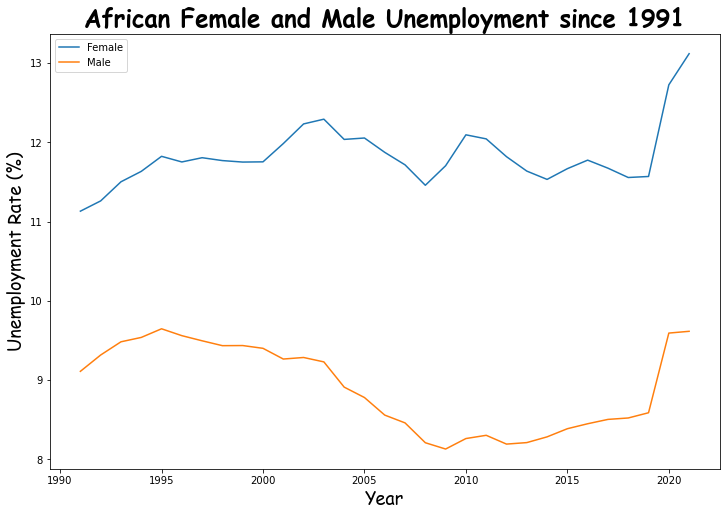

In [23]:
# Group by 'year' and calculate the mean for 'female_no' and 'male_no'
mean_values = african_df.groupby('Year')[['female_unemployed', 'male_unemployed']].mean().reset_index()

# Plotting the line chart
plt.figure(figsize=(12, 8))

plt.plot(mean_values['Year'], mean_values['female_unemployed'], label='Female')
plt.plot(mean_values['Year'], mean_values['male_unemployed'], label='Male')

plt.title('African Female and Male Unemployment since 1991', fontfamily='Comic Sans MS', fontsize=24, fontweight='bold')
plt.xlabel('Year', fontfamily='Comic Sans MS', fontsize=18)
plt.ylabel('Unemployment Rate (%)', fontfamily='Comic Sans MS', fontsize=18)
plt.legend()
plt.savefig("african_female_male_unemployment",bbox_figure="tight",dpi=300)
plt.show()

### Compare top and bottom 5 performing countries unemployment wise

<Figure size 864x576 with 0 Axes>

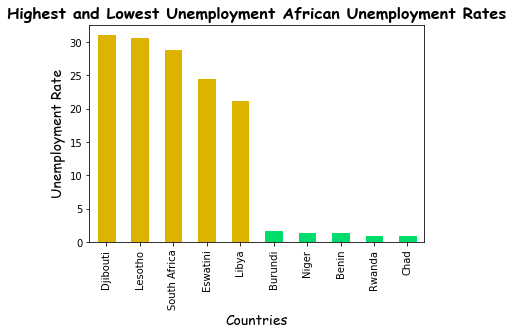

In [24]:
# Calculate the mean values for 'female_no' and 'male_no' for each country
mean_values = african_df.groupby('Country')[['female_unemployed', 'male_unemployed']].mean()

# Calculate the total mean for each country (sum of mean values for 'female_no' and 'male_no')
mean_values['total_mean'] = mean_values.mean(axis=1)

# Sort the DataFrame based on the total mean values in descending order
sorted_means = mean_values.sort_values(by='total_mean', ascending=False)

# Select the top 5 and bottom 5 countries
selected_countries = pd.concat([sorted_means.head(5), sorted_means.tail(5)])

# Plotting the bar plot with specified colors for each bar
plt.figure(figsize=(12, 8))

bars = selected_countries[['total_mean']].plot(kind='bar', legend=False)

# Set colors for the first 5 bars to red and the remaining 5 to green
for i, bar in enumerate(bars.patches):
    if i < 5:
        bar.set_color('#DCB400')
    else:
        bar.set_color('#00DC69')

plt.title('Highest and Lowest Unemployment African Unemployment Rates', fontfamily='Comic Sans MS', fontsize=16, fontweight='bold')
plt.xlabel('Countries', fontfamily='Comic Sans MS', fontsize=14)
plt.ylabel('Unemployment Rate', fontfamily='Comic Sans MS', fontsize=14)

# Remove the legend
plt.legend().remove()

plt.show()

In [25]:
# Extract the countries from the index of selected_countries DataFrame (best and worst 5 performing countries)
countries_list = selected_countries.index.tolist()

# Filter the DataFrame to include only rows corresponding to selected countries
comparison_df = african_df[african_df['Country'].isin(countries_list)]

### Compare each Country's percentage Budget Allocated to Education

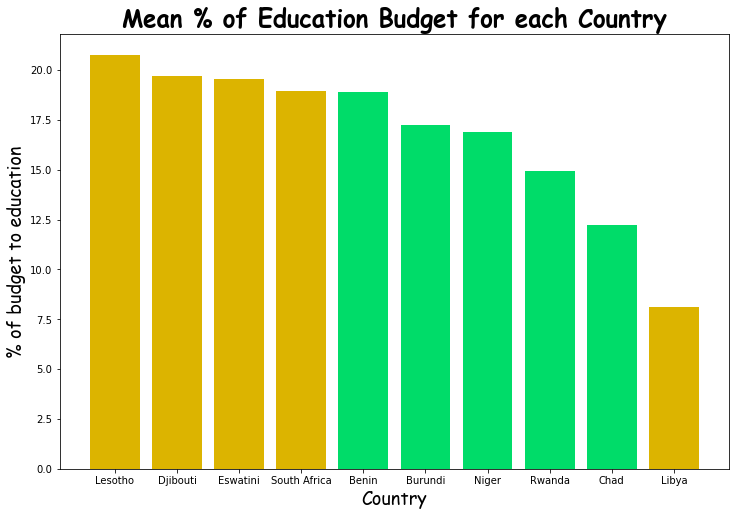

In [26]:
# Group by Continent and calculate the mean
mean_values = comparison_df.groupby('Country')['Education_expenditure'].mean()

# Sort values in descending order
mean_values = mean_values.sort_values(ascending=False)

# Set a larger figure size
plt.figure(figsize=(12, 8))

# Plotting the bar chart with custom colors
colors = ['#DCB400' if country in ['Djibouti','Lesotho','South Africa','Eswatini','Libya',] else '#00DC69' for country in mean_values.index]
plt.bar(mean_values.index, mean_values.values,color=colors)

plt.xlabel('Country', fontfamily='Comic Sans MS', fontsize=18)
plt.ylabel('% of budget to education', fontfamily='Comic Sans MS', fontsize=18)
plt.title('Mean % of Education Budget for each Country', fontfamily='Comic Sans MS', fontsize=24, fontweight='bold')
plt.savefig("Mean_%_of_Education_Budget_for_african_countries",bbox_figure="tight",dpi=300)
# Show the plot
plt.show()

### Compare each country's percentage access to electricity

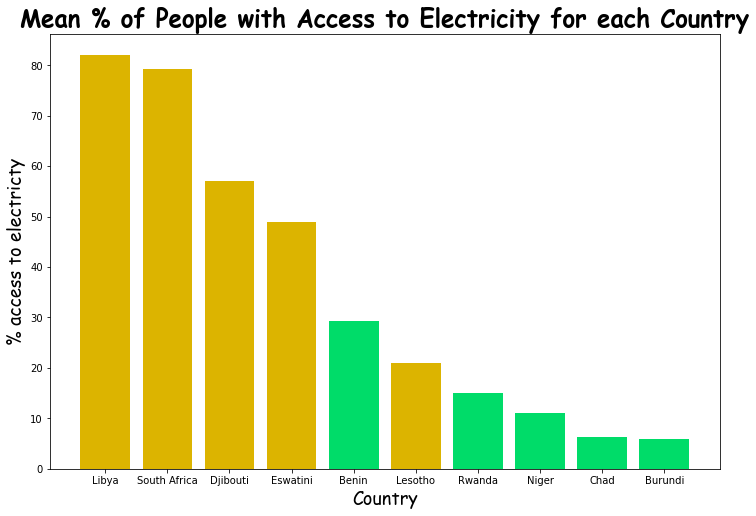

In [27]:
# Group by country and calculate the mean
mean_values = comparison_df.groupby('Country')['electricity_access'].mean()

# Sort values in descending order
mean_values = mean_values.sort_values(ascending=False)

# Set a larger figure size
plt.figure(figsize=(12, 8))

# Plotting the bar chart with custom colors
colors = ['#DCB400' if country in ['Djibouti','Lesotho','South Africa','Eswatini','Libya',] else '#00DC69' for country in mean_values.index]
plt.bar(mean_values.index, mean_values.values,color=colors)

plt.xlabel('Country', fontfamily='Comic Sans MS', fontsize=18)
plt.ylabel('% access to electricty', fontfamily='Comic Sans MS', fontsize=18)
plt.title('Mean % of People with Access to Electricity for each Country', fontfamily='Comic Sans MS', fontsize=24, fontweight='bold')
plt.savefig("Mean_%_of_electricity_access_for_african_countries",bbox_figure="tight",dpi=300)
# Show the plot
plt.show()

### Compare each Country's mean business density ratio

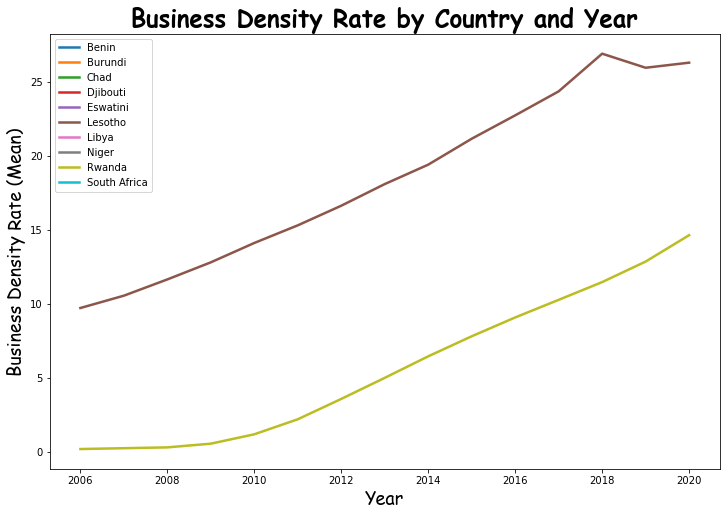

In [28]:
# Calculate the mean business density ratio for each combination of Country and Year
mean_density = comparison_df.groupby(['Country', 'Year'])['Business_Density_rate'].mean().reset_index()

# Create a line plot
plt.figure(figsize=(12, 8))

# Iterate over unique regions and plot a line for each with a thicker linewidth
for region in mean_density['Country'].unique():
    region_data = mean_density[mean_density['Country'] == region]
    plt.plot(region_data['Year'], region_data['Business_Density_rate'], label=region, linewidth=2.5)  # Adjust linewidth as needed

# Set plot labels and title
plt.xlabel('Year', fontfamily='Comic Sans MS', fontsize=18)
plt.ylabel('Business Density Rate (Mean)', fontfamily='Comic Sans MS', fontsize=18)
plt.title('Business Density Rate by Country and Year', fontfamily='Comic Sans MS', fontsize=24, fontweight='bold')

# Add a legend
plt.legend()

plt.savefig("African_Business_Density_Rate_by_Region_and_Year",bbox_figure="tight",dpi=300)

# Show the plot
plt.show()

### Counting occurrences for each youth empowerment category within each country

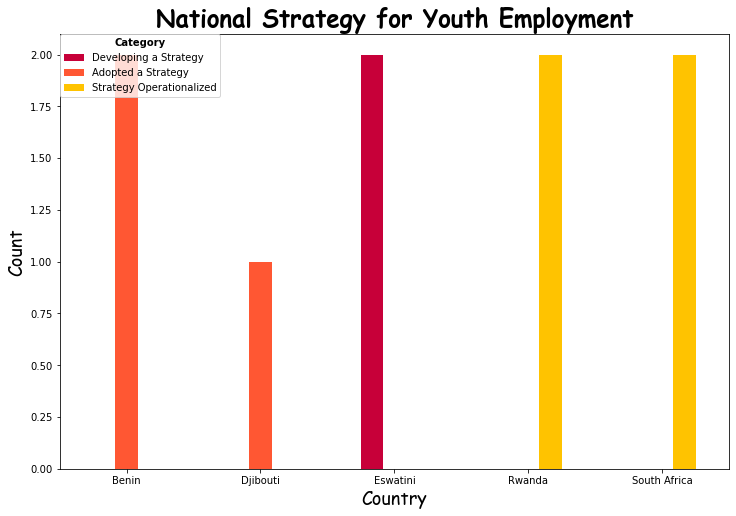

In [29]:
# Counting occurrences for each youth empowerment category within each country
counts = comparison_df.groupby(['Country', 'Strategy_level']).size().unstack(fill_value=0)

# Custom color palette
custom_colors = ['#C70039', '#FF5733', '#FFC300', '#DAF7A6']

# Plotting the clustered bar chart
ax = counts.plot(kind='bar', stacked=False, color=custom_colors, figsize=(12, 8))

plt.title('National Strategy for Youth Employment', fontfamily='Comic Sans MS', fontsize=24, fontweight='bold')
plt.xlabel('Country', fontfamily='Comic Sans MS', fontsize=18)
plt.ylabel('Count', fontfamily='Comic Sans MS', fontsize=18)
plt.xticks(rotation=0)  # Rotate x-axis labels to be horizontal

# Legend replacements
legend_labels = {
    0: 'No Strategy',
    1: 'Developing a Strategy',
    2: 'Adopted a Strategy',
    3: 'Strategy Operationalized'
}

# Replace legend labels
handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(handles, [legend_labels[int(float(label))] for label in labels], title='Category', loc='upper left', bbox_to_anchor=(0, 1), borderaxespad=0.)
legend.get_title().set_fontweight('bold')  # Set legend title to bold

plt.savefig("African_National_Strategy_for_Youth_Employment", bbox_inches="tight", dpi=300)
# Show the plot
plt.show()

### More Observations

1. **Female unemployment has always been higher than the male’s**
2. **Unemployment rates of both genders follow the same pattern (ie they are susceptible to the same factors)**
3. **The countries with high unemployment spend a good proportion of the budget on education compared with the ones with low unemployment rates**
4. **Surprisingly, the countries with high unemployment have a higher number of people with access to electricity**
5. **Data is incomplete for the National Strategy for Youth Employment and Business Density Rates**

### Limitations of data

1. **Incomplete data with a lot of Null values**
2. **Limited data given**

### Recommendations

1. **Target female centric unemployment approaches to deal with the gender disparity**
2. **Conduct further research to understand the specific challenges contributing to higher female unemployment and tailor policies accordingly.**
3. **The countries with high unemployment spend a good proportion of the budget on education compared with the ones with low unemployment rates**
4. **Implement mentorship programs and internship opportunities to bridge the gap between education and employment for young people.**
5. **Business density rate in Africa is so small and govt should help in this regard**
6. **Provide financial incentives, tax breaks, and regulatory support to encourage entrepreneurship and business development.**
7. **There should be better record keeping in the future**